# Today We will see how to import MySql DB into Pandas    

# and then converting  MySql table to Pandas DataFrame.

In [36]:
import pandas as pd
from mysql import connector as con
from matplotlib import pyplot as plt

In [37]:
#lets create DB connection
db=con.connect(host="localhost",user="root",password="mehaa1903",database="sakila")

In [38]:
#lets create cursor object
cur=db.cursor()

In [39]:
#lets see the table names from Sakila database
tables=cur.execute("show tables")

In [40]:
tables=cur.fetchall()

In [41]:
tables

[('actor',),
 ('actor_info',),
 ('address',),
 ('category',),
 ('city',),
 ('country',),
 ('customer',),
 ('customer_list',),
 ('film',),
 ('film_actor',),
 ('film_category',),
 ('film_list',),
 ('film_text',),
 ('inventory',),
 ('language',),
 ('nicer_but_slower_film_list',),
 ('payment',),
 ('rental',),
 ('sales_by_film_category',),
 ('sales_by_store',),
 ('staff',),
 ('staff_list',),
 ('store',)]

In [42]:
# we have successfully imported mysql into Pandas.

In [43]:
#lets look at the table sales by file category
table=cur.execute("select * from sales_by_film_category")

In [44]:
table=cur.fetchall()

In [45]:
table

[('Sports', Decimal('5314.21')),
 ('Sci-Fi', Decimal('4756.98')),
 ('Animation', Decimal('4656.30')),
 ('Drama', Decimal('4587.39')),
 ('Comedy', Decimal('4383.58')),
 ('Action', Decimal('4375.85')),
 ('New', Decimal('4351.62')),
 ('Games', Decimal('4281.33')),
 ('Foreign', Decimal('4270.67')),
 ('Family', Decimal('4226.07')),
 ('Documentary', Decimal('4217.52')),
 ('Horror', Decimal('3722.54')),
 ('Children', Decimal('3655.55')),
 ('Classics', Decimal('3639.59')),
 ('Travel', Decimal('3549.64')),
 ('Music', Decimal('3417.72'))]

In [46]:
# we have got the table output. lets convert it to Pandas DataFrame.
df=pd.DataFrame(table,columns=cur.column_names)

In [47]:
# we have successfully created our Pandas DataFrame. lets look at it.
df

,category,total_sales
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58
5,Action,4375.85
6,New,4351.62
7,Games,4281.33
8,Foreign,4270.67
9,Family,4226.07


In [48]:
#lets plot the data into bar chart.
df.plot(kind='bar')

TypeError: Empty 'DataFrame': no numeric data to plot

In [49]:
# it is showing that there is no numeric data to plot. lets look at the datatypes.
df.dtypes

category       object
total_sales    object
dtype: object

In [50]:
#total_sales column is showing as an object. lets convert it.
df.total_sales=df.total_sales.astype(float)

In [51]:
df.dtypes

category        object
total_sales    float64
dtype: object

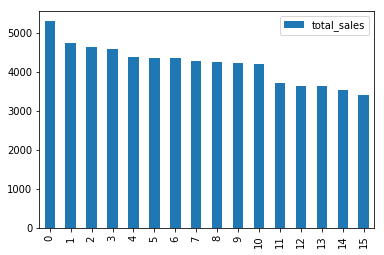

In [52]:
#lets plot it now.
df.plot(kind='bar')

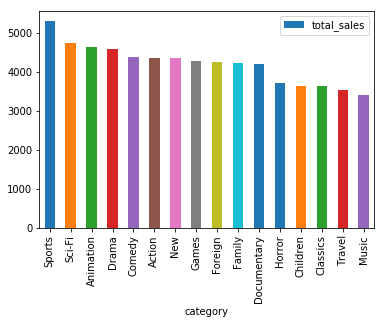

In [53]:
# x-axis index is showing numeric values. lets pull the original values.
df.plot(kind='bar',x='category',y='total_sales')

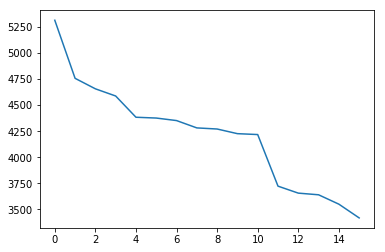

In [54]:
# it is now showing actual values on x-axis. 
# the same chart we can create it using matplotlib.
plt.plot(df.total_sales)

In [ ]:
#thats all. thank you for watching the video.